In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Reading data from csv
train = pd.read_csv("/content/drive/MyDrive/fake_news_project/train.csv",engine="python",error_bad_lines=False)
train.head()

Skipping line 13535: field larger than field limit (131072)
Skipping line 19783: field larger than field limit (131072)
Skipping line 13541: Expected 5 fields in line 13541, saw 6
Skipping line 19782: Expected 5 fields in line 19782, saw 7
Skipping line 19783: Expected 5 fields in line 19783, saw 10
Skipping line 19785: Expected 5 fields in line 19785, saw 14
Skipping line 19787: Expected 5 fields in line 19787, saw 8
Skipping line 19789: Expected 5 fields in line 19789, saw 7
Skipping line 19790: Expected 5 fields in line 19790, saw 15
Skipping line 19791: Expected 5 fields in line 19791, saw 9
Skipping line 19792: Expected 5 fields in line 19792, saw 9
Skipping line 19793: Expected 5 fields in line 19793, saw 12
Skipping line 19794: Expected 5 fields in line 19794, saw 15
Skipping line 19795: Expected 5 fields in line 19795, saw 8
Skipping line 19796: Expected 5 fields in line 19796, saw 20
Skipping line 19797: Expected 5 fields in line 19797, saw 8
Skipping line 19798: Expected 5 fi

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train_1 = train.set_index("label")
train_1.head()

,id,title,author,text
label,,,,
1,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
0,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
1,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
1,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
1,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
train_1.value_counts

<bound method DataFrame.value_counts of           id  ...                                               text
label         ...                                                   
1          0  ...  House Dem Aide: We Didn’t Even See Comey’s Let...
0          1  ...  Ever get the feeling your life circles the rou...
1          2  ...  Why the Truth Might Get You Fired October 29, ...
1          3  ...  Videos 15 Civilians Killed In Single US Airstr...
1          4  ...  Print \nAn Iranian woman has been sentenced to...
...      ...  ...                                                ...
0      20795  ...  Rapper T. I. unloaded on black celebrities who...
0      20796  ...  When the Green Bay Packers lost to the Washing...
0      20797  ...  The Macy’s of today grew from the union of sev...
1      20798  ...  NATO, Russia To Hold Parallel Exercises In Bal...
1      20799  ...    David Swanson is an author, activist, journa...

[20822 rows x 4 columns]>

In [ ]:
train_1 = train_1.drop(" как люди воспринимают своё положение.")

In [ ]:
train_1['label'] = train_1.index
train_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,title,author,text,label
label,,,,,
1,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
0,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
1,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
1,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
1,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train_1=train_1.reset_index(drop=True)
train_1.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train=train_1

In [ ]:
# Displaying rows and columns in dataset
print("There are {} number of rows and {} number of columns".format(train.shape[0],train.shape[1]))

There are 20821 number of rows and 5 number of columns


Data Preprocessing

In [ ]:
# Checking the null values in training data.
train.isnull().sum()

id           0
title      565
author    1975
text        59
label       22
dtype: int64

In [ ]:
train=train.dropna()

In [ ]:
# Checking the null values in testing data.
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
# Displaying rows and columns in dataset
print("There are {} number of rows and {} number of columns".format(train.shape[0],train.shape[1]))

There are 18284 number of rows and 5 number of columns


In [ ]:
# Creating a variable "merged" by merging columns "title" and "author"
train["merged"] = train["title"]+" "+train["author"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Seperating Independent and dependent features
X = train.drop(columns=['label'],axis=1)
y = train['label']

In [ ]:
# Creating One-Hot Representations
messages = X.copy()
messages.reset_index(inplace=True)

NLP preprocessing methods

In [ ]:
# Performing data preprocessing on column 'title'
from nltk.stem import WordNetLemmatizer
ps = WordNetLemmatizer()
def perform_preprocess(data):
    corpus = []
    for i in range(0,len(data)):
        review = re.sub('[^a-zA-Z]',' ',data['merged'][i])
        review = review.lower()
        review = review.split()
        review = [ps.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
    return corpus
    
train_corpus = perform_preprocess(messages)
train_corpus[1]

'flynn hillary clinton big woman campus breitbart daniel j flynn'

Below code converts the pre-processed words to one-hot vectors in the range of vocabulary size=5000. This is done to obtain numerical feature matrix

In [ ]:
# Converting to one-hot repr.
vocab_size = 5000
one_hot_train = [one_hot(word,vocab_size) for word in train_corpus]

Below code creates an embedding layer which applies "pre" padding to the one-hot encoded features with sentence length = 20. Padding is applied so that the length of every sequence in the dataset should be same

In [ ]:
# Embedding Representation 
sent_length = 20
embedd_docs_train = pad_sequences(one_hot_train,padding='pre',maxlen=sent_length)
print(embedd_docs_train)

[[   0    0    0 ...  657 3905 4869]
 [   0    0    0 ... 2026 2953 2659]
 [   0    0    0 ... 4221  902 3370]
 ...
 [   0    0    0 ...  260 4336 1326]
 [   0    0    0 ...  971  458  276]
 [   0    0    0 ... 4205 3829   31]]


In [ ]:
# Converting Embedding repr. to array
x_final = np.array(embedd_docs_train)
y_final = np.array(y)


In [ ]:
# Dimensions of prev. array repr.
x_final.shape,y_final.shape

((18284, 20), (18284,))

Dividing the dataset into training,validation and testing data (ratio: 80/10/10) using train_test_split technique.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.1, random_state=42)
X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

Models

1. Logistic Regresssion

In [ ]:
model_1 = LogisticRegression(max_iter=500)
model_1.fit(X_train,Y_train)
pred_1 = model_1.predict(x_test)
cr1    = classification_report(y_test,pred_1)
print(cr1)

              precision    recall  f1-score   support

           0       0.74      0.84      0.78      1032
           1       0.74      0.61      0.67       797

    accuracy                           0.74      1829
   macro avg       0.74      0.72      0.73      1829
weighted avg       0.74      0.74      0.73      1829



[[862 170]
 [310 487]]


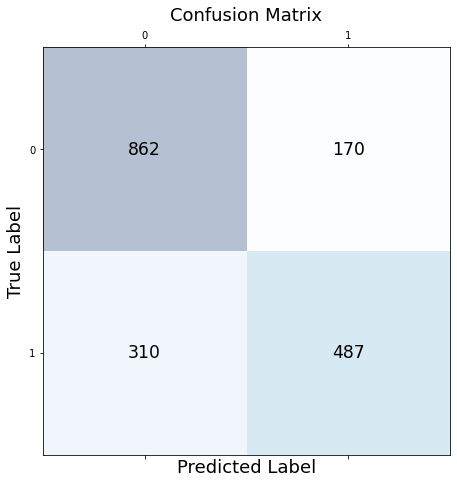

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics


import sklearn.metrics
import numpy

conf_matrix= sklearn.metrics.confusion_matrix(y_test,pred_1)
print(conf_matrix)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

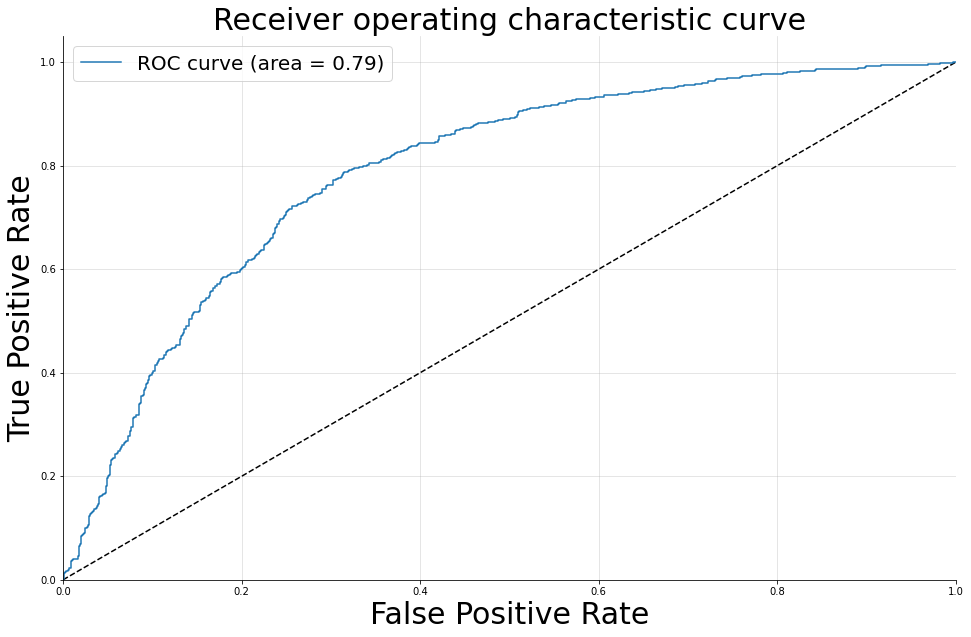

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test) #

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        tpr[i], fpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=30)
    ax.set_ylabel('True Positive Rate',fontsize=30)
    ax.set_title('Receiver operating characteristic curve',fontsize=30)
    
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % (roc_auc[i]))
    ax.legend(loc="best", prop={"size":20})
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(model_1, x_test, y_test, n_classes=2, figsize=(16, 10))

2.Decision Tree

In [ ]:
from sklearn import tree
model_2 = tree.DecisionTreeClassifier()
model_2.fit(X_train,Y_train)
pred_2 = model_2.predict(x_test)
cr2   = classification_report(y_test,pred_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1032
           1       0.88      0.88      0.88       797

    accuracy                           0.90      1829
   macro avg       0.90      0.89      0.89      1829
weighted avg       0.90      0.90      0.90      1829



[[940  92]
 [ 97 700]]


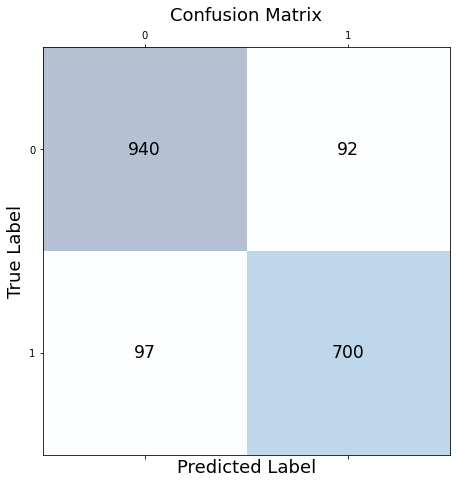

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics


import sklearn.metrics
import numpy

conf_matrix= sklearn.metrics.confusion_matrix(y_test,pred_2)
print(conf_matrix)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

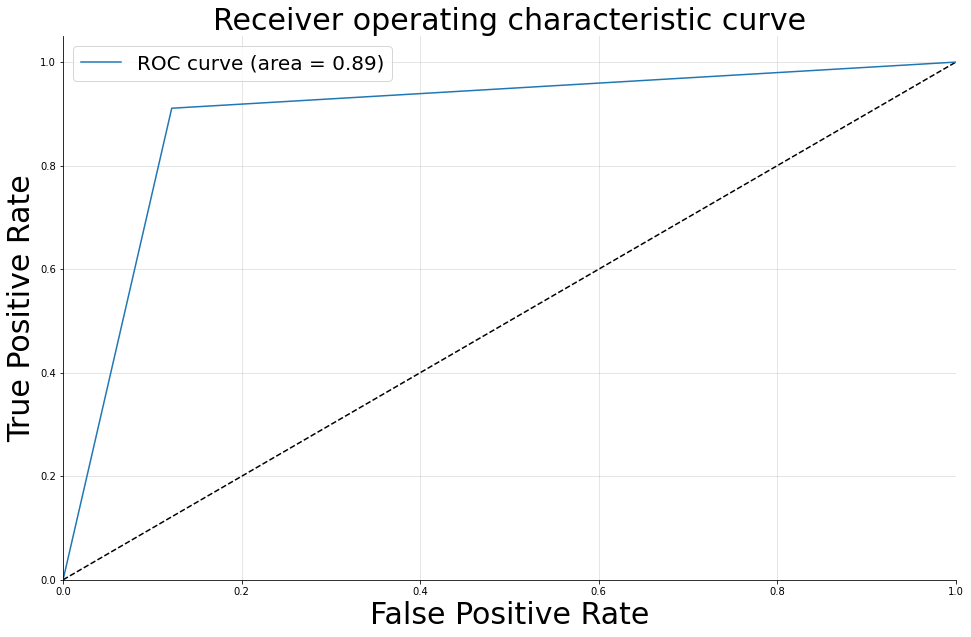

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test) #

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        tpr[i], fpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=30)
    ax.set_ylabel('True Positive Rate',fontsize=30)
    ax.set_title('Receiver operating characteristic curve',fontsize=30)
    
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % (roc_auc[i]))
    ax.legend(loc="best", prop={"size":20})
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(model_2, x_test, y_test, n_classes=2, figsize=(16, 10))

3. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
model_3 = SVC(probability=True)
model_3.fit(X_train,Y_train)
pred_3 = model_3.predict(x_test)
cr3    = classification_report(y_test,pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1032
           1       0.75      0.70      0.72       797

    accuracy                           0.77      1829
   macro avg       0.76      0.76      0.76      1829
weighted avg       0.77      0.77      0.77      1829



[[848 184]
 [243 554]]


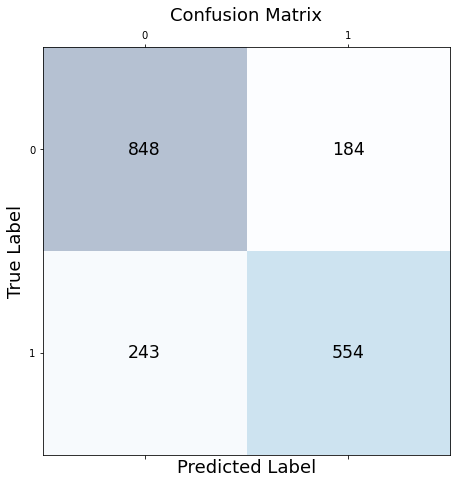

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics


import sklearn.metrics
import numpy

conf_matrix= sklearn.metrics.confusion_matrix(y_test,pred_3)
print(conf_matrix)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

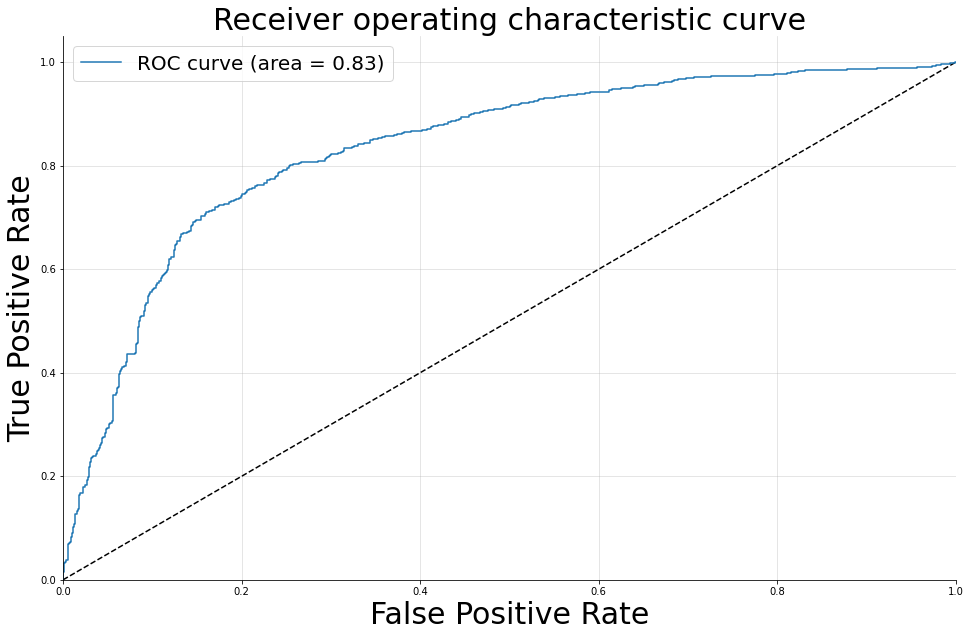

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test) #

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        tpr[i], fpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=30)
    ax.set_ylabel('True Positive Rate',fontsize=30)
    ax.set_title('Receiver operating characteristic curve',fontsize=30)
    
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % (roc_auc[i]))
    ax.legend(loc="best", prop={"size":20})
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(model_3, x_test, y_test, n_classes=2, figsize=(16, 10))

In [ ]:
model_4 = MultinomialNB()
model_4.fit(X_train,Y_train)
pred_4 = model_4.predict(x_test)
cr4   = classification_report(y_test,pred_4,labels=np.unique(pred_4))
print(cr4)

                                                  precision    recall  f1-score   support

 чтобы это была дорога с двусторонним движением.       0.00      0.00      0.00         0
                                               0       0.75      0.54      0.63      1032
                                               1       0.58      0.73      0.65       797

                                        accuracy                           0.63      1829
                                       macro avg       0.44      0.43      0.43      1829
                                    weighted avg       0.68      0.63      0.64      1829



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_4 = KNeighborsClassifier(n_neighbors=3)
model_4.fit(X_train,Y_train)
pred_4 = model_4.predict(x_test)
cr4   = classification_report(y_test,pred_4)
print(cr4)

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      1032
           1       0.72      0.66      0.69       797

    accuracy                           0.74      1829
   macro avg       0.74      0.73      0.73      1829
weighted avg       0.74      0.74      0.74      1829



[[830 202]
 [270 527]]


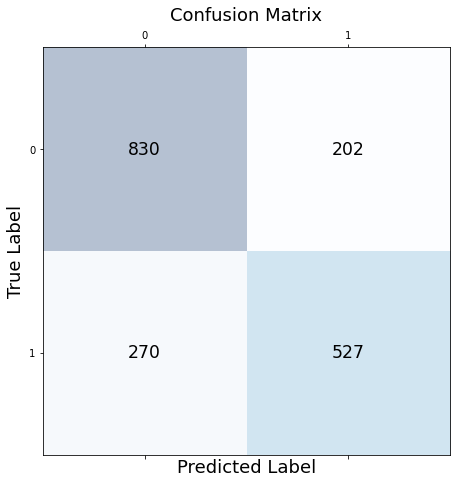

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics


import sklearn.metrics
import numpy

conf_matrix= sklearn.metrics.confusion_matrix(y_test,pred_4)
print(conf_matrix)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

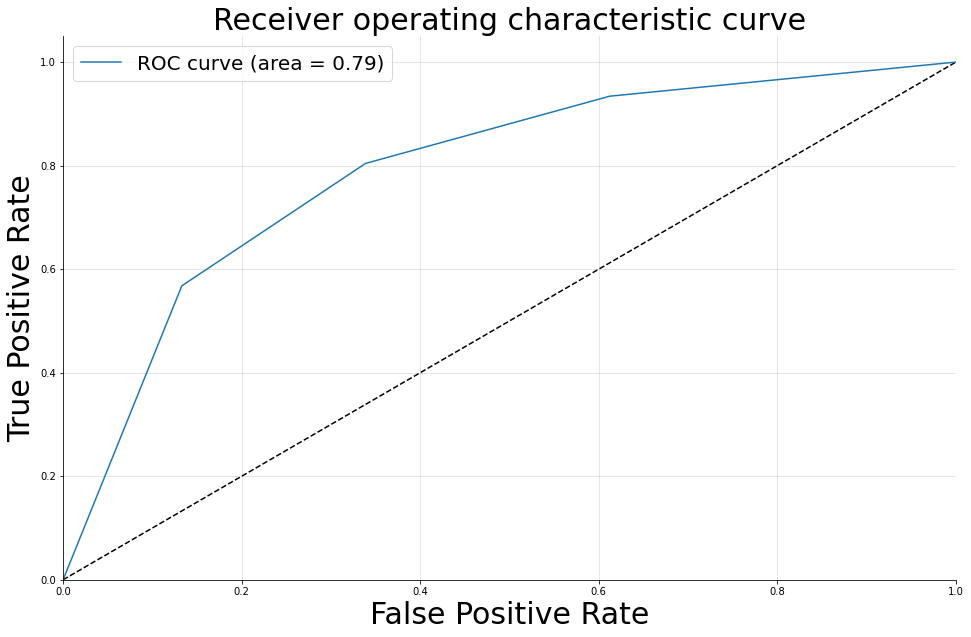

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test) #

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        tpr[i], fpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=30)
    ax.set_ylabel('True Positive Rate',fontsize=30)
    ax.set_title('Receiver operating characteristic curve',fontsize=30)
    
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % (roc_auc[i]))
    ax.legend(loc="best", prop={"size":20})
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(model_4, x_test, y_test, n_classes=2, figsize=(16, 10))

Evaluation of Models

In [ ]:

score_1 = accuracy_score(y_test,pred_1)
score_2 = accuracy_score(y_test,pred_2)
score_3 = accuracy_score(y_test,pred_3)
score_4 = accuracy_score(y_test,pred_4)

In [ ]:
results = pd.DataFrame([["Logistic Regression",score_1],["Decision Tree",score_2],["SVM",score_3],["Naive Byes",score_4]],columns=["Model","Accuracy"])
results

,Model,Accuracy
0,Logistic Regression,0.737562
1,Decision Tree,0.896665
2,SVM,0.766539
3,Naive Byes,0.741935
